<h1><center>

</center></h1>
<font size="6"><center>
EIE 401
PROCESAMIENTO DIGITAL MULTIMEDIA 
</center></font>


<center><h2>Actividad 4</h2></center>
<center><h3>Audio</h3></center>
<center><h3>Profesor: Jorge Cardenas</h3></center>

<center><h3>Por: José Alvarado Espinoza</h3></center>
<center><h5>Pontificia Universidad Catolica de Valparaiso</h5></center>
 

## 1. Realiza la operación de convolución

<p align="justify">
Una de las operaciones más comunes en tratamiento de imagenes, video etc, es la convolución. Comienza por realizar una convolución entre una señal Pulso y una función impulso filtrada.


<center><img src="../../assets/scipy-signal-convolution.png"/></center>


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal


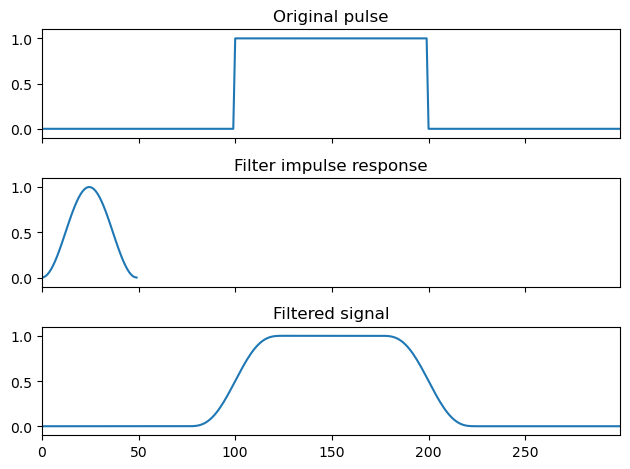

In [6]:
"""Ejemplo sacado de https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve.html"""
sig = np.repeat([0., 1., 0.], 100)
win = signal.windows.hann(50)
filtered = signal.convolve(sig, win, mode='same') / sum(win)

# Graficamos
fig, (ax_orig, ax_win, ax_filt) = plt.subplots(3, 1, sharex=True)

ax_orig.plot(sig)
ax_orig.set_title('Original pulse')
ax_orig.margins(0, 0.1)
ax_win.plot(win)
ax_win.set_title('Filter impulse response')
ax_win.margins(0, 0.1)
ax_filt.plot(filtered)
ax_filt.set_title('Filtered signal')
ax_filt.margins(0, 0.1)

fig.tight_layout()

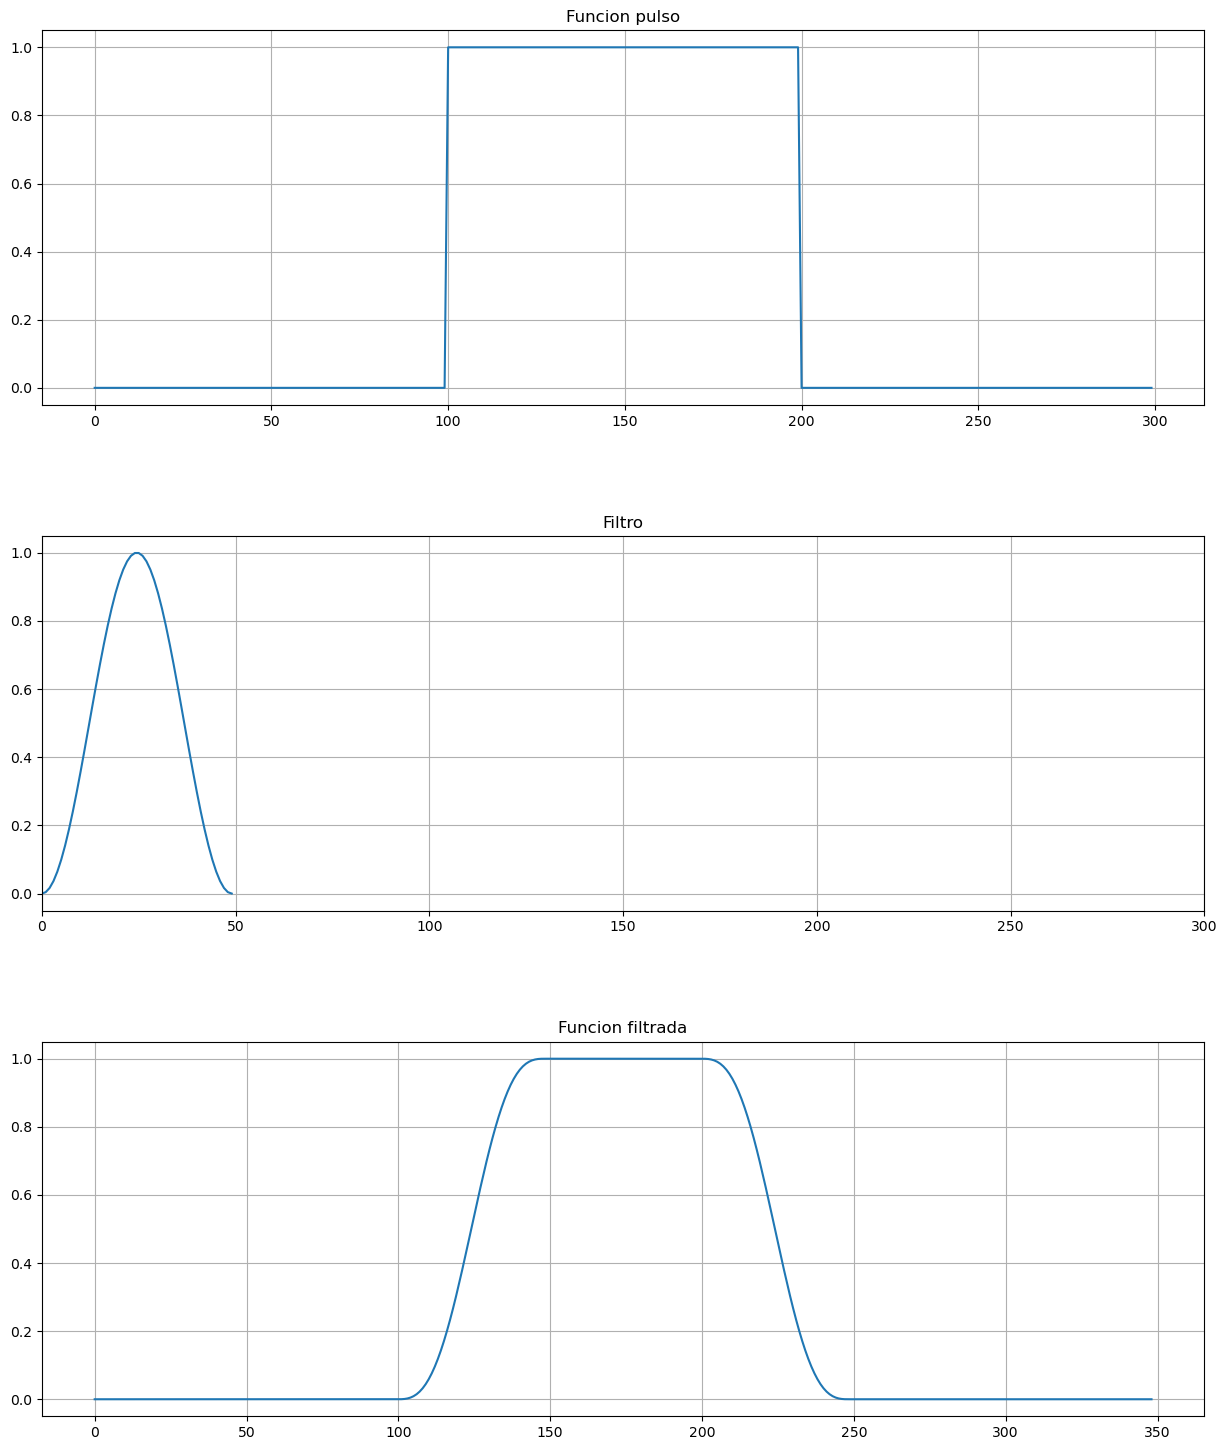

In [7]:
""" Convolución solo usando Numpy """

# Creamos el pulso
pulso = np.zeros(300)
pulso[100: 200] = 1

# Creamos el impulso o ventana de hann

# Definir el número de puntos en la ventana
N = 50
# Crear un arreglo de n
n = np.arange(N)
# Calcular la ventana de Hann
w = 0.5 - 0.5 * np.cos(2 * np.pi * n / (N - 1))

# Convolucion con numpy
resultado = np.convolve(pulso,w)/sum(w)

# Graficamos la funcion solicitada

fig, ax = plt.subplots(3, 1, figsize=(15, 18))
plt.subplots_adjust(hspace = 0.35 ) 

# Grafica sin ruido
ax[0].plot(pulso)
ax[0].set_title("Funcion pulso")
ax[0].grid()

# Grafica ajustada para observar mejor el espectro
ax[1].plot(w)
ax[1].set_title("Filtro")
ax[1].set_xlim(0, 300)
ax[1].grid()

ax[2].plot(resultado)
ax[2].set_title("Funcion filtrada")
ax[2].grid()


plt.show()

## 2. Cancelación de Ruido (Denoising)
<p align="justify">
Implementa un algoritmo para eliminar el ruido de una señal. Puedes apoyarte en esta referencia (https://www.youtube.com/watch?v=s2K1JfNR7Sc)

1. Debes tener la señal original
2. Debes agregar ruido a la señal
3. Obtener el valor medio de la señal con ruido
4. Implementar transformaciones y filtrado.
    


0.03289282552378206


E:\Python\Anaconda\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
E:\Python\Anaconda\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


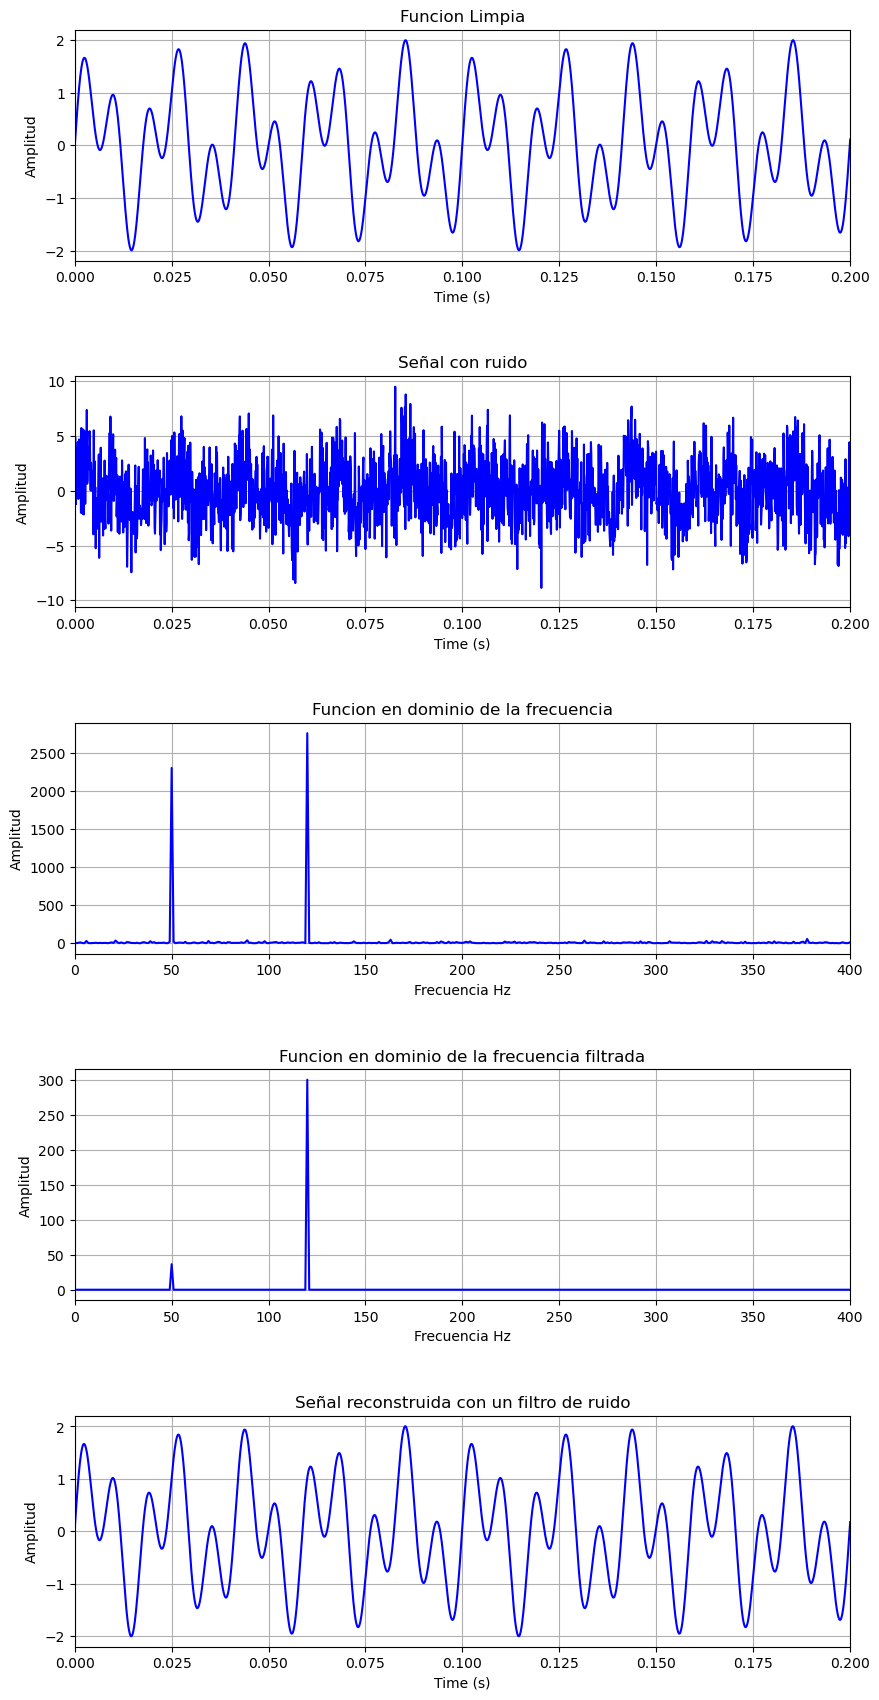

In [10]:
# creamos la señal con ruido

dt = 0.0001
t = np.arange(0, 1, dt)

señal = np.sin(2* np.pi * 50 * t) + np.sin(2* np.pi * 120 * t) # señales con dos frecuencias
señal_limpia = señal
señal = señal + 2.5 * np.random.randn(len(t)) # añadimos ruido a la señal y la guardamos en la variable inicial 

valor_medio = np.mean(señal) # para calcular el valor medio de la señal con ruido
print(valor_medio)

# Transformada de fourier

n_1 = len(t)
ft_señal = np.fft.fft(señal , n_1)              # FFT
PSD = ft_señal * np.conj(ft_señal) / n_1        # Power spectrum 
frec_1 = (1 / (dt * n_1 )) * np.arange(n_1)     # creamos el eje x de frecuencia
L = np.arange(1, np.floor(n_1/2), dtype = "int")

# Uso de PSD para filtrar el ruido de la señal

indices = PSD > 100 
PSDclean = PSD * indices
ft_señal_fil = indices * ft_señal
señal_filtrada = np.fft.ifft(ft_señal_fil) # FFT inversa para volver al dominio del tiempo

# Graficamos todo
fig, ax = plt.subplots(5, 1, figsize = (10, 21))
plt.subplots_adjust(hspace = 0.5 ) 

ax[0].plot(t, señal_limpia , color = "Blue")
ax[0].set_title("Funcion Limpia")
ax[0].set_xlim(0, 0.2)
ax[0].set_xlabel("Time (s)")
ax[0].set_ylabel("Amplitud")
ax[0].grid()

ax[1].plot(t, señal, color = "Blue")
ax[1].set_title("Señal con ruido")
ax[1].set_xlabel("Time (s)")
ax[1].set_ylabel("Amplitud")
ax[1].set_xlim(0, 0.2)
ax[1].grid()

ax[2].plot(frec_1, PSD, color = "Blue")
ax[2].set_title("Funcion en dominio de la frecuencia")
ax[2].set_xlabel("Frecuencia Hz")
ax[2].set_ylabel("Amplitud")
ax[2].set_xlim(0, 400)
ax[2].grid()

ax[3].plot(frec_1, ft_señal_fil, color = "Blue")
ax[3].set_title("Funcion en dominio de la frecuencia filtrada")
ax[3].set_xlabel("Frecuencia Hz")
ax[3].set_ylabel("Amplitud")
ax[3].set_xlim(0, 400)
ax[3].grid()

ax[4].plot(t, señal_filtrada, color = "Blue")
ax[4].set_title("Señal reconstruida con un filtro de ruido")
ax[4].set_xlabel("Time (s)")
ax[4].set_ylabel("Amplitud")
ax[4].set_xlim(0, 0.2)
ax[4].grid()

plt.show()


## 3. Wavelets
### 3.1 Desarrolla una transformada wavelet 1D
<p align="justify">
Implementa transformaciones con 1-D wavelet usando la función Mexican Hat Wavelet.

$$m(x) = \frac{2}{\sqrt{3 \sigma} \pi^{\frac{1}{4}}} \left(1-\frac{x^2}{\sigma^2}\right) e^{\frac{-x^2}{2 \sigma^2}}$$


In [13]:
import numpy as np
import matplotlib.pyplot as plt

def mexican_hat(x, mu, sigma):
    """
    Define funcion sombrero mexicano
    
    Entradas: 
             un arreglo, un desplazamiento del arreglo y sigma que modifica el ancho del sombrero
             
    retorna:
            El calculo del sombrero
    """
    x = x - mu # Desplazamiento 
    r_4 = np.power(np.pi, 0.25) #Raiz a la cuarta
    hat = (2 / (np.sqrt(3 * sigma) * r_4 )) * (1 - ( x**2/sigma**2 )) * np.exp((-x**2)/(2 * sigma)) # Sombrero
    return hat


### 3.2 Escribe un algoritmo para calcular la transformada discreta
<p align="justify">
En cierta forma se trata solo de aplicar al sumatoria sobre una señal que tengas (obviamente debes definir una señal de estudio, con ruido o que tenga varías frecuencias involucradas).

Debes hacerlo solo para un nivel (level). Recuerda que la transformada trabaja por niveles y puede ser dispendioso. En este caso de debe considerar que $$a_0=2$$ y $$b_0=1$$, así como también debe asumir un valor específico para _m_.

En teoría, la transformada es como sigue:

$$ (T^{\text{wav}} f)(a,b) = \sqrt{|a|} \int dt \; f(t) \psi \left(\frac{t-b}{a}\right) $$

$a = a_0^m$ and $b = n b_0 a_0^m$

Aquí a y b son parámetros para la escala y posición de la wavelet. Esto se puede escribir de forma discreta de tal forma que puedas asignar una posición y escala a la onda asignando los valores que quieres, pero en este caso usarás $$a_0=2$$ y $$b_0=1$$. 

$$ (T^{\text{wav}} f)(a,b) = T^\text{wav}_{m,n}(f) = \int dt \; f(t) \psi_{m,n} (x) $$
con
$$ \psi_{m,n} = a_0^{\frac{-m}{2}} \psi\left(a_0^{-m}x - nb_0\right) $$

### Recuerda que la integral se convierte en una sumatoria.

###  3.2.1. Explica el siguiente fragmento de código en detalle

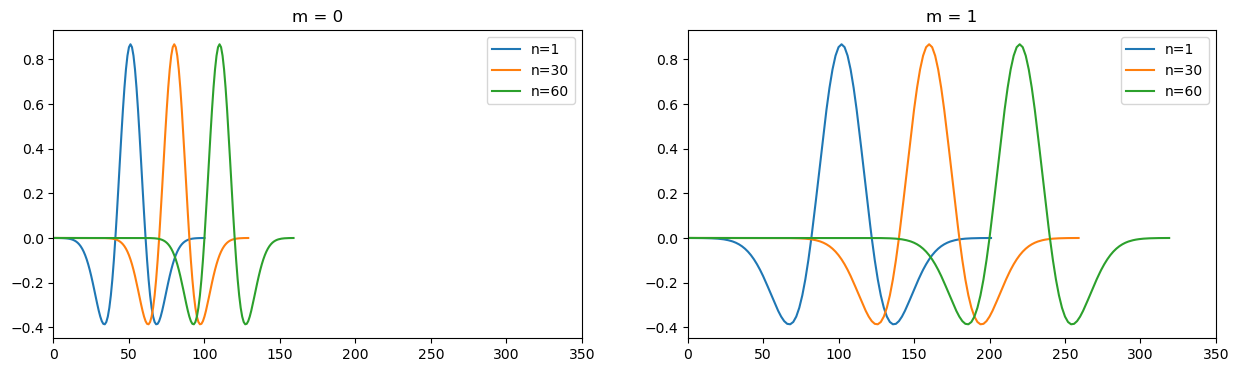

In [16]:
# we assume a0 = 2 and b0 = 1
# These are the scaling and translation factors
#using just o pair, means an specific wavelet
def psi_mn(psi, m, n):
    """
    Ingresamos psi que en este codigo seria la funcion del sombrero con la finalidad de imprimir las graficas y desplazarlas segun corresponda.
    psi es una señal de entrada basada en el sombrero mexicano para este caso, m es un entero utilizado para calcular dos variables de las señales a imprimir a y b,
    ademas de decidir cuando las desplazaremos, n es un arreglo de valores que se utilizara para calcular en donde deben iniciar 
    las funciones del sombrero.
    
    
    argumentos:
                psi es una señal de entrada basada en el sombrero mexicano, m es un entero, n es un arreglo de valores
                
    Salida:
                Wav es la señal modificada
    """
    a = 2**m
    b = n*2**m
    wav = np.zeros(len(psi)*a + b)
    wav[b:b+len(psi)*a] = np.interp(np.arange(len(psi)*a)/a,np.arange(len(psi)),psi)
    return wav

psi = mexican_hat(np.arange(-5,5,0.1),0,1)
xlim = (0,350)
ns = [1, 30, 60]  #Valores en los que se desplazara el sombrero, si agregas otro valor aparecera una nueva señal en la grafica
ms = [0, 1]       #Cantidad de graficas que haremos
plt.figure(figsize=(15,4))
plt.subplot(121)

for mi in range(len(ms)):
    m = ms[mi]
    plt.subplot(1,len(ms),mi+1)
    for n in ns:
        plt.plot(psi_mn(psi, m, n), label="n="+str(n))
    plt.title("m = "+str(m))
    plt.legend(loc="best")
    plt.xlim(xlim)
plt.show()

### 3.2.2 completa el siguiente código para realizar la transformada


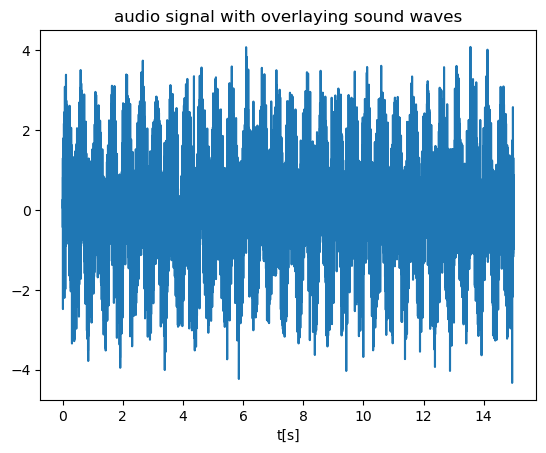

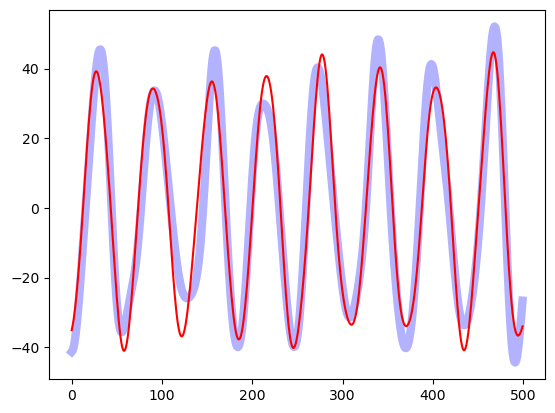

In [18]:
""" Basandonos en https://notebook.community/CSchoel/learn-wavelets/wavelet-introduction"""


"""Transformed considering the sum over the section under study"""
def twav_mn(f, psi, m, n):
    """
    Esta implementación muestra cuántas operaciones son realmente necesarias para calcular la DWT
    """
    
    f_scaled = f[::2**m]
    transform_scaled = 2**(m/2.0) * np.sum(f_scaled[n:n+len(psi)] * psi)
    return transform_scaled

"""Naive Transform adding over the whole length"""

def twav_mn_naive(f, psi, m, n):
    """
    Esta implementación utiliza los wavelets transformados para ilustrar la idea de la transformación.
    """
    pmn = psi_mn(psi, m, n)
    transform = 2**(-m/2.0) * np.sum(f[:len(pmn)] * pmn)
    return transform


m = 3 #single value for m
ns = np.arange(1000,1500)
res=1000 #resolution
freq=2 #frequency
"""Creating a wave to analyse"""
x = np.arange(0,15000,1) # Produces [0, 100) with steps of 2.
noise = np.random.normal(0,1, len(x)) #  μ = 0, σ = 2, size = length of x or y. Choose μ and σ wisely.
#adding noise
audio=np.sin(np.arange(15000)*2*np.pi*freq/res)+noise


transformed_sweept=[twav_mn(audio, psi, m, n) for n in ns]
naive_transformed_sweept=[twav_mn_naive(audio, psi, m, n) for n in ns]

plt.plot(np.arange(len(audio),dtype="float32")/res,audio)
plt.xlabel("t[s]")
plt.title("audio signal with overlaying sound waves")
plt.show()



plt.plot(transformed_sweept,color="blue", lw=6, alpha=0.3)
plt.plot(naive_transformed_sweept, "r-")
plt.show()

### 3.2 Wavelet usando librería
<p align="justify">
Usa la librería PyWavelets (pywt) con los datos provenientes del dataset  = "http://paos.colorado.edu/research/wavelets/wave_idl/sst_nino3.dat". Estos datos son históricos sobre el fenómeno del Niño. 

0. Debes descargar los datos desde python, usando numpy o pandas, debes aplicar la transformada continua pywt.cwt.

1. Obtendrás los coeficientes de la transformación.
2. Debes poner todos los resultados en términos de potencia. 
3. Debes graficar el resultado tanto en el periodo como en la frecuencia usando un plot tipo contour.

504
   Niño
0 -0.15
1 -0.30
2 -0.14
3 -0.41
4 -0.46


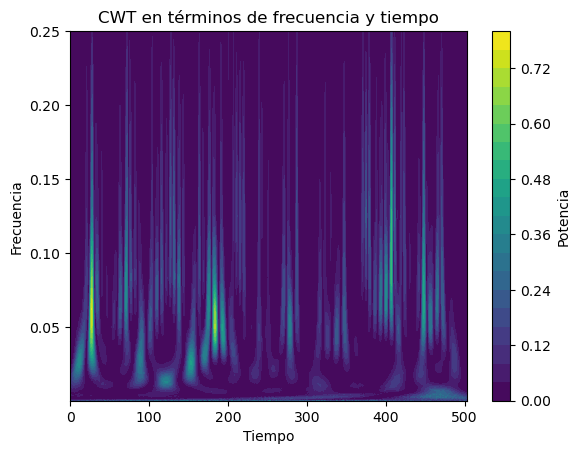

In [20]:
import pandas as pd
import pywt
import numpy as np
import matplotlib.pyplot as plt

# URL del archivo de datos
url = "https://paos.colorado.edu/research/wavelets/wave_idl/sst_nino3.dat"

# Leer los datos 
df = pd.read_csv(url, sep="\s+", header=None, names=["Niño"])

# Mostrar las primeras filas para asegurarnos que cargamos bien
print(df.size)
print(df.head())
x = np.arange(504)
#Transformada continua
y = np.sin(2 * np.pi * df["Niño"]/32)
coef, freqs = pywt.cwt(y, np.arange(1, 505), "mexh")

# Representar los coeficientes en un gráfico tipo contour

plt.contourf(x, freqs,np.abs(coef)**2, levels=20, cmap='viridis')
plt.colorbar(label="Potencia")
plt.xlabel("Tiempo")
plt.ylabel("Frecuencia")
plt.title("CWT en términos de frecuencia y tiempo")
plt.show()

504
   Niño
0 -0.15
1 -0.30
2 -0.14
3 -0.41
4 -0.46


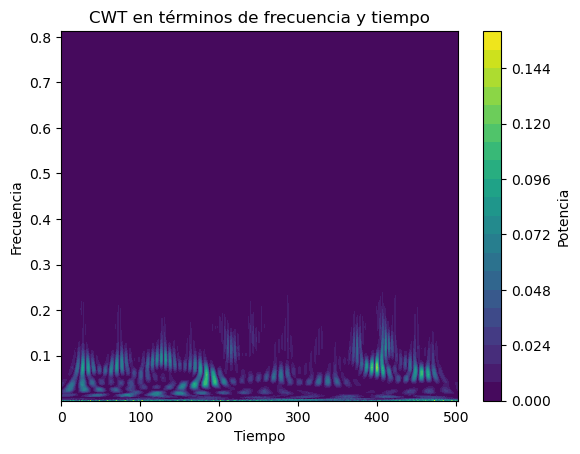

In [21]:
import pandas as pd
import pywt
import numpy as np
import matplotlib.pyplot as plt

# URL del archivo de datos
url = "https://paos.colorado.edu/research/wavelets/wave_idl/sst_nino3.dat"

# Leer los datos 
df = pd.read_csv(url, sep="\s+", header=None, names=["Niño"])

# Mostrar las primeras filas para asegurarnos que cargamos bien
print(df.size)
print(df.head())
x = np.arange(504)
#Transformada continua
y = np.sin(2 * np.pi * df["Niño"]/70)
coef, freqs = pywt.cwt(y, np.arange(1, 700), "morl")

# Representar los coeficientes en un gráfico tipo contour

plt.contourf(x, freqs,np.abs(coef)**2, levels=20, cmap='viridis')
plt.colorbar(label="Potencia")
plt.xlabel("Tiempo")
plt.ylabel("Frecuencia")
plt.title("CWT en términos de frecuencia y tiempo")
plt.show()

### 3.3 Interpreta los resultados del punto anterior.
<p align="justify">
Debes explicar que significa el gráfico obtenido  en términos del periodo o frecuencia del evento que estamos analizando.

En la grafica se puede observar un patron que muestra la concentracion de temperaturas a lo largo del tiempo, observamos como aumentaria la potencia de estos valores cada ves que el evento climatico se aproxima y como las ultimas mediciones son mas altas con mas frecuencia.


### 4. Referencias

https://notebook.community/CSchoel/learn-wavelets/wavelet-introduction

https://www.kaggle.com/code/asauve/a-gentle-introduction-to-wavelet-for-data-analysis

https://pywavelets.readthedocs.io/en/latest/ref/cwt.html

[Análisis espectral para audio] https://ccrma.stanford.edu/~jos/mdft/mdft-python.html

[Cancelación de ruido en datos] https://towardsdatascience.com/noise-cancellation-with-python-and-fourier-transform-97303314aa71

[Convolución en Scipy]https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve.html

[Wavelet transform applications]https://scicoding.com/introduction-to-wavelet-transform-using-python/
